In [20]:
import qiskit
from qutip import Qobj, tensor, ptrace
import qiskit_aer
import numpy as np
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit_experiments.library import StateTomography
from qiskit.quantum_info import DensityMatrix

In [21]:
def evolve_basic(g, dt, N):
    
    circ = qiskit.QuantumCircuit(N)
    
    x_angle = - dt * g

    z_angle = - dt
    
    
    #e^B
    for i in range(int(N/2-1)):
        circ.rzz(z_angle, 2*i+1, 2*i+2) # z rotation
        
    for i in range(int(N/2)):
        circ.rzz(z_angle, 2*i, 2*i+1) # z rotation
           
    #e^A        
    for i in range(N):
        circ.rx(x_angle, i) # x rotation
    
    
    return circ

In [22]:
def evolve_symmetric(g, dt, N):
    
    circ = qiskit.QuantumCircuit(N)
    
    x_angle = - dt * g

    z_angle = - dt
    
    for i in range(N):
        
        circ.rx(x_angle/2, i) # x rotation
        
    for i in range(int(N/2-1)):
        
        circ.rzz(z_angle, 2*i+1, 2*i+2) # z rotation
        
    for i in range(int(N/2)):
        
        circ.rzz(z_angle, 2*i, 2*i+1) # z rotation
        
    for i in range(N):
        
        circ.rx(x_angle/2, i) # x rotation
        
    return circ

In [23]:
def partial_trace(rho):

    keep = list(range(5, 10))
    
    rho_reduced = ptrace(rho, keep)
    
    numpy = rho_reduced.full()
    
    return numpy


def von_neumann_entropy(rho):
    
    eigenvalues = np.linalg.eigvalsh(rho)
    
    non_zero_eigenvalues = eigenvalues[eigenvalues > 0]
    
    S = -np.sum(non_zero_eigenvalues * np.log(non_zero_eigenvalues))
    
    return S


def renyi2_entropy(rho):
    
    rho_squared = np.dot(rho, rho)
    
    trace_rho_squared = np.trace(rho_squared)
    
    S2 = -np.log(trace_rho_squared)
    
    return S2

In [24]:
N = 10
g = 2 
t = 5
dt = 0.1
array_size = int(t/dt)
tomo_rep=2000

S = np.zeros(array_size)
S2 = np.zeros(array_size)

#Evolve_Basic = evolve_basic(g, dt, N)
sim = AerSimulator()


for i in range(array_size):

    combined = qiskit.QuantumCircuit(N)
    
    for j in range(i+1):
        combined = combined.compose(evolve_basic(g, dt, N))
        
    
    tomo = StateTomography(combined, measurement_indices=list(np.arange(round(N/2), N)))
    
    #print(i)
    
    expdata = tomo.run(sim, seed_simulation=tomo_rep).block_for_results()

    rho_fit = expdata.analysis_results("state").value  #extract the density matrix
    
    rho_fit=np.array(rho_fit) #np array
    
    print(np.size(rho_fit)) 
    print(i)
    
    #qobj = Qobj(rho_fit, dims=[[2]*5, [2]*(5)]) #partial trace take input qobj object
    
    #Rho = partial_trace(qobj) #output np matrix
    

    S[i] = von_neumann_entropy(rho_fit)
    S2[i] = np.real(renyi2_entropy(rho_fit))

1024
0
1024
1
1024
2
1024
3
1024
4
1024
5
1024
6
1024
7
1024
8
1024
9
1024
10
1024
11
1024
12
1024
13
1024
14
1024
15
1024
16
1024
17
1024
18
1024
19
1024
20
1024
21
1024
22
1024
23
1024
24
1024
25
1024
26
1024
27
1024
28
1024
29
1024
30
1024
31
1024
32
1024
33
1024
34
1024
35
1024
36
1024
37
1024
38
1024
39
1024
40
1024
41
1024
42
1024
43
1024
44
1024
45
1024
46
1024
47
1024
48
1024
49


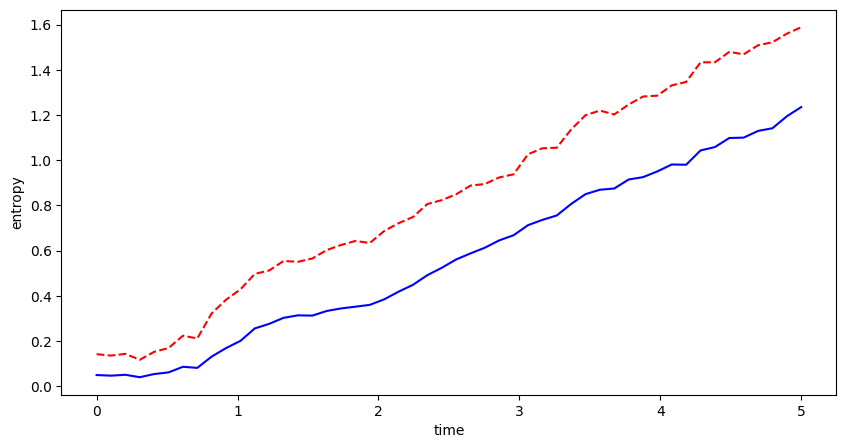

In [25]:
fig, ax = plt.subplots(1,figsize=(10,5))
ax.plot(np.linspace(0, t, array_size), S,'r--', label='S') 
ax.plot(np.linspace(0, t, array_size), S2,'b-', label='$S^{(2)}$')
plt.xlabel('time')
plt.ylabel('entropy')
plt.savefig("plt_es12_2000.pdf")
plt.show()